In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [6]:
# Read the CSV files into dataframes
Customers_df = pd.read_csv(r"C:\Users\Lenovo\Downloads\data science intern\Customers.csv")
transactions_df = pd.read_csv(r"C:\Users\Lenovo\Downloads\data science intern\Transactions.csv")
products_df = pd.read_csv(r"C:\Users\Lenovo\Downloads\data science intern\Products.csv")


In [12]:
# Assuming `customers_df` and `transactions_df` are loaded DataFrames
merged_data = transactions_df.groupby("CustomerID").agg({
    "TotalValue": "sum",  # Total spending
    "Quantity": "sum",    # Total quantity purchased
    "TransactionID": "count"  # Number of transactions
}).reset_index()
merged_data

# Merge with customer profile
merged_data = merged_data.merge(Customers_df, on="CustomerID", how="left")

#Feature Engineering
# Select and normalize numerical features
features = merged_data[["TotalValue", "Quantity", "TransactionID"]]
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)
normalized_features

array([[-0.06170143, -0.12203296, -0.01145819],
       [-0.87774353, -0.44800021, -0.46749414],
       [-0.40585722,  0.20393428, -0.46749414],
       [ 1.03254704,  1.67078689,  1.35664965],
       [-0.78392861, -0.93695108, -0.92353008],
       [ 0.41587942, -0.12203296, -0.46749414],
       [-0.48548229, -0.77396745, -0.92353008],
       [ 0.43997044,  1.18183602,  2.26872154],
       [-1.40630171, -1.58888557, -0.92353008],
       [-0.9571662 , -0.12203296, -0.46749414],
       [ 0.14369581,  0.04095066, -0.01145819],
       [ 0.96492372,  1.0188524 ,  0.9006137 ],
       [ 1.38575064,  0.85586877,  0.9006137 ],
       [-1.72239508, -1.75186919, -1.83560198],
       [-1.26353893, -1.42590195, -1.37956603],
       [ 0.22269727, -0.44800021, -0.01145819],
       [ 0.70375173,  1.34481964,  1.35664965],
       [ 0.71908486,  0.85586877, -0.01145819],
       [-0.70101045, -0.28501659,  0.44457776],
       [-1.39212827, -1.58888557, -1.83560198],
       [ 1.0681256 ,  0.69288515,  1.356

In [11]:
# Clustering with KMeans
num_clusters = 4  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(normalized_features)
merged_data["Cluster"] = labels

# Evaluate Clustering Performance
db_index = davies_bouldin_score(normalized_features, labels)
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.8650620583623065


In [13]:
labels

array([2, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 3, 3, 1, 1, 2, 0, 3, 2, 1, 3, 3,
       3, 3, 1, 2, 2, 0, 2, 2, 2, 1, 1, 3, 2, 1, 3, 2, 3, 2, 0, 1, 1, 2,
       0, 3, 3, 2, 3, 2, 3, 2, 3, 0, 2, 2, 3, 1, 0, 1, 1, 1, 1, 2, 0, 2,
       3, 0, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 3, 0, 1, 0, 1, 2, 0, 2,
       1, 3, 3, 2, 0, 1, 1, 3, 1, 3, 0, 3, 0, 0, 2, 0, 3, 2, 2, 3, 0, 1,
       2, 1, 0, 3, 2, 2, 2, 2, 1, 2, 1, 3, 1, 3, 2, 3, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 3, 2, 3, 3, 1, 0, 2, 0, 1, 0, 2, 3, 3, 3, 1, 1, 2, 3, 2,
       3, 0, 2, 2, 1, 2, 3, 0, 3, 2, 0, 2, 1, 2, 3, 3, 3, 2, 0, 2, 0, 2,
       2, 2, 3, 3, 3, 2, 3, 2, 1, 2, 0, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2,
       3], dtype=int32)

Davies-Bouldin Index: 0.8650620583623065


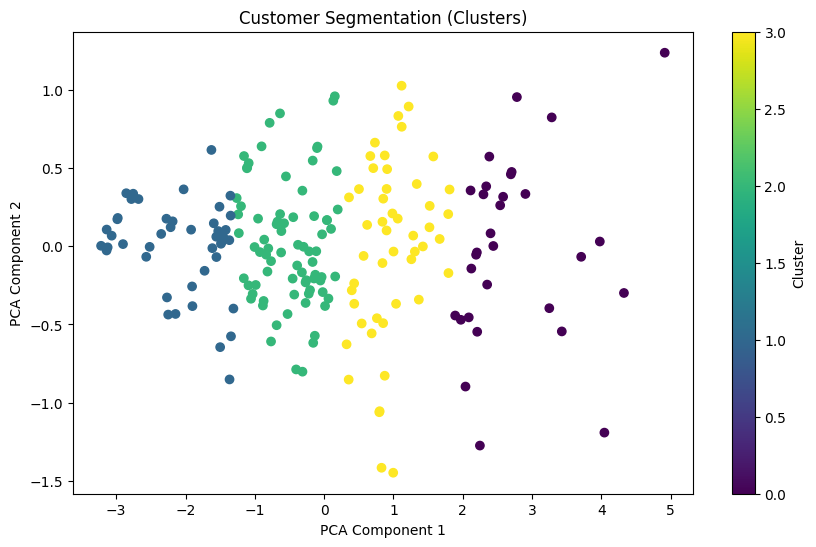

In [9]:

# Visualize Clusters
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(normalized_features)
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap="viridis")
plt.title("Customer Segmentation (Clusters)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Save the results
